Data Collection

Visualising and analysing data

Importing libaries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [5]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import xgboost as xgb

Read dataset

In [7]:
df = pd.read_csv("onlinefraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [8]:
df.drop(["isFlaggedFraud"], axis=1, inplace=True)


In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [10]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [11]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [12]:
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [13]:
df["isFraud"].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [14]:
legit = df[df["isFraud"]==0]


In [15]:
fraud = df[df["isFraud"]==1]


In [16]:
legit = legit.sample(n=8213)


In [17]:
legit.shape, fraud.shape


((8213, 10), (8213, 10))

In [18]:
new_df = pd.concat([legit, fraud], axis=0)


In [19]:
new_df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3950340,287,PAYMENT,27952.60,C347350118,1228.00,0.00,M1354812503,0.00,0.00,0
409302,18,PAYMENT,7760.59,C1887559268,345567.11,337806.51,M778427863,0.00,0.00,0
3757840,279,CASH_IN,232738.34,C954898217,30958.00,263696.34,C1167163882,0.00,0.00,0
2554087,206,PAYMENT,12016.73,C2017873047,20599.63,8582.90,M111565305,0.00,0.00,0
3313874,252,CASH_OUT,267054.06,C435685461,40653.00,0.00,C901606487,2562886.51,2829940.57,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [20]:
new_df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3950340,287,PAYMENT,27952.60,C347350118,1228.00,0.00,M1354812503,0.00,0.00,0
409302,18,PAYMENT,7760.59,C1887559268,345567.11,337806.51,M778427863,0.00,0.00,0
3757840,279,CASH_IN,232738.34,C954898217,30958.00,263696.34,C1167163882,0.00,0.00,0
2554087,206,PAYMENT,12016.73,C2017873047,20599.63,8582.90,M111565305,0.00,0.00,0
3313874,252,CASH_OUT,267054.06,C435685461,40653.00,0.00,C901606487,2562886.51,2829940.57,0


In [21]:
new_df.tail()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [22]:
new_df["isFraud"].value_counts()


isFraud
0    8213
1    8213
Name: count, dtype: int64

In [23]:
new_df.to_csv('balanced_dataset.csv', index=False, encoding='utf-8')


In [24]:
corr = df.corr(numeric_only=True)


In [26]:
corr


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

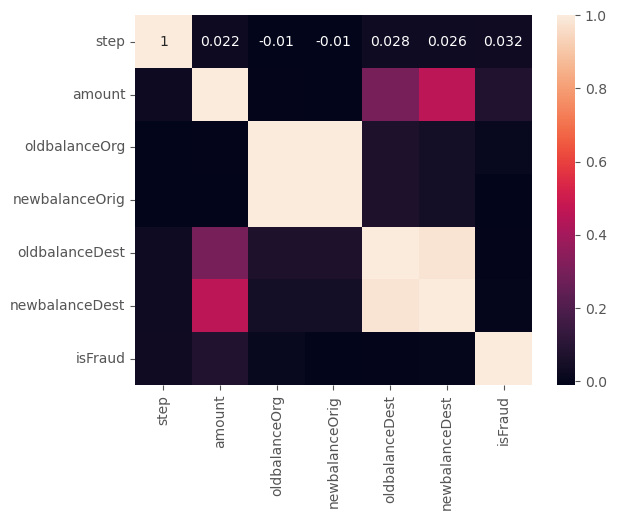

In [27]:
sns.heatmap(corr, annot=True)


<Axes: xlabel='step', ylabel='Count'>

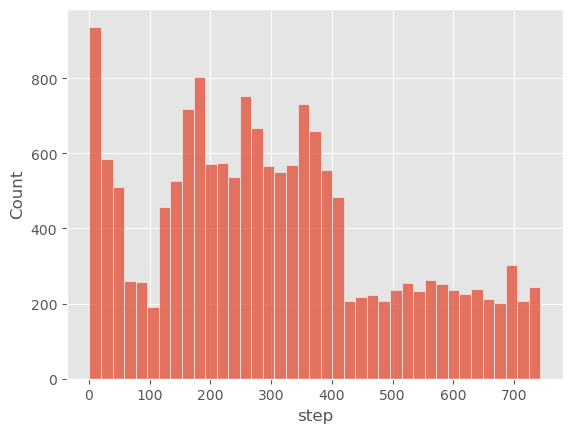

In [28]:
sns.histplot(data=new_df, x="step")


<Axes: xlabel='step'>

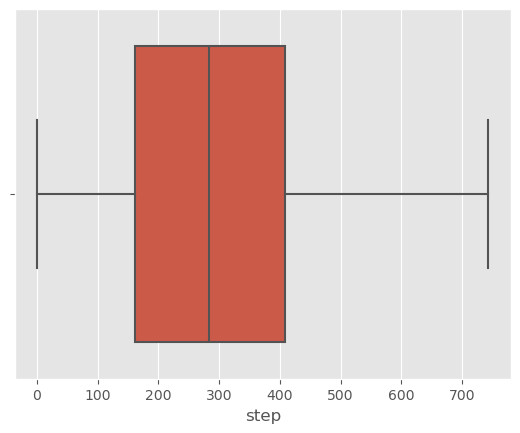

In [29]:
sns.boxplot(data=new_df, x="step")


<Axes: xlabel='type', ylabel='count'>

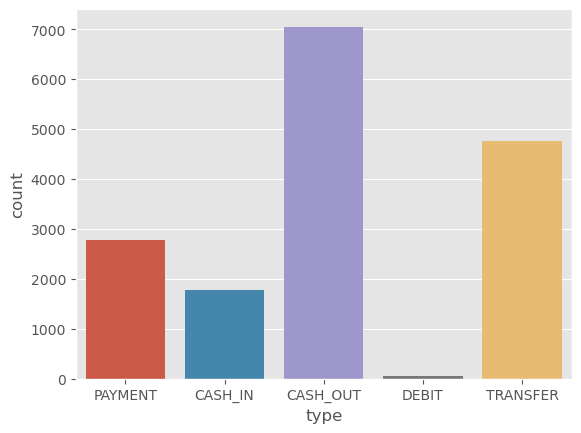

In [30]:
sns.countplot(data=new_df, x="type")


<Axes: xlabel='amount', ylabel='Count'>

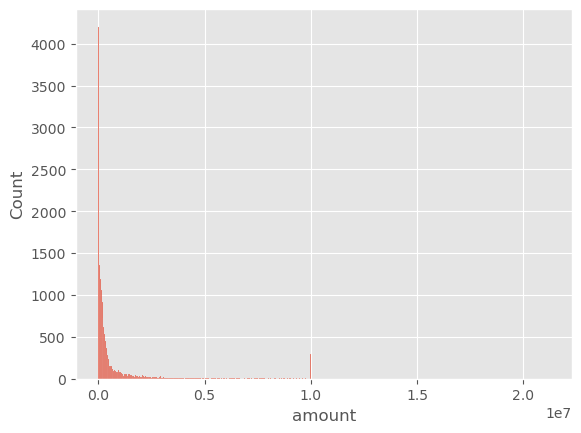

In [31]:
sns.histplot(data=new_df, x="amount")


<Axes: xlabel='amount'>

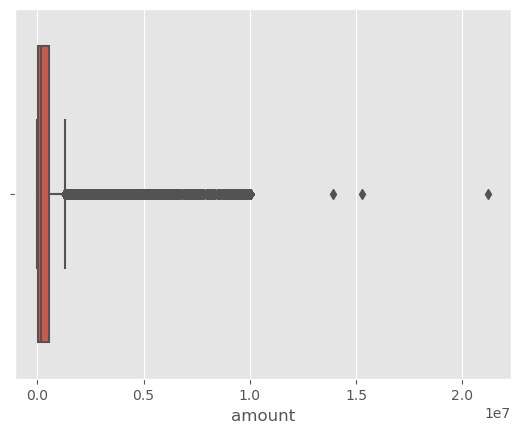

In [32]:
sns.boxplot(data=new_df, x="amount")
 

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

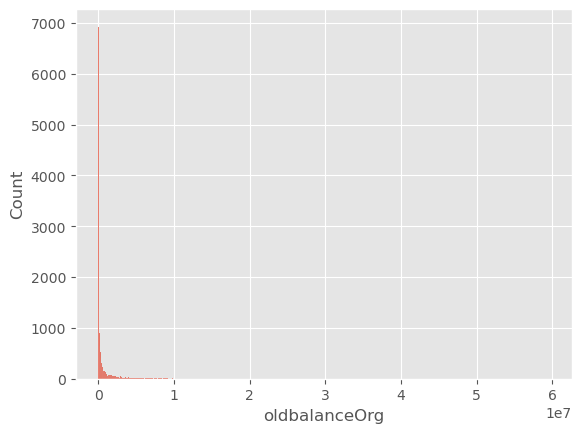

In [33]:
sns.histplot(data=new_df, x="oldbalanceOrg")


In [34]:
df["nameDest"].value_counts()


nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

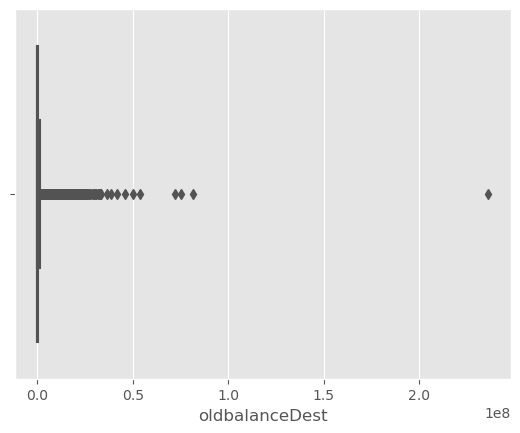

In [35]:
sns.boxplot(data=new_df, x="oldbalanceDest")


<Axes: xlabel='newbalanceDest'>

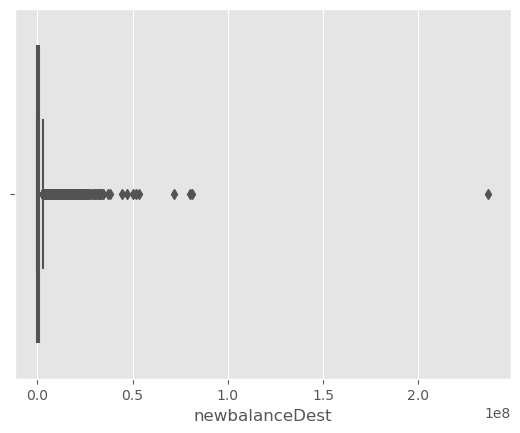

In [36]:
sns.boxplot(data=new_df, x="newbalanceDest")


<Axes: xlabel='isFraud', ylabel='count'>

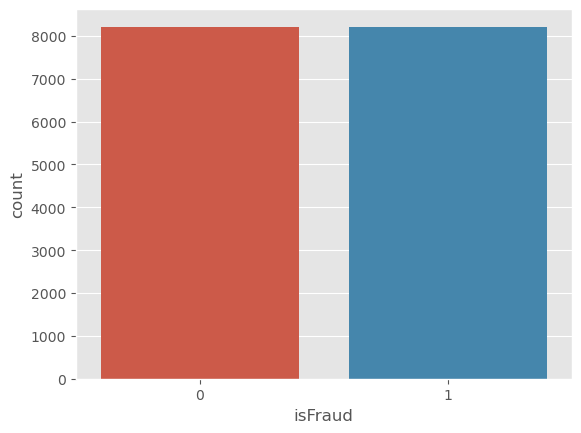

In [37]:
sns.countplot(data=new_df, x="isFraud")


Bivariate analysis
The process of finding the relation between two features is called bivariate analysis

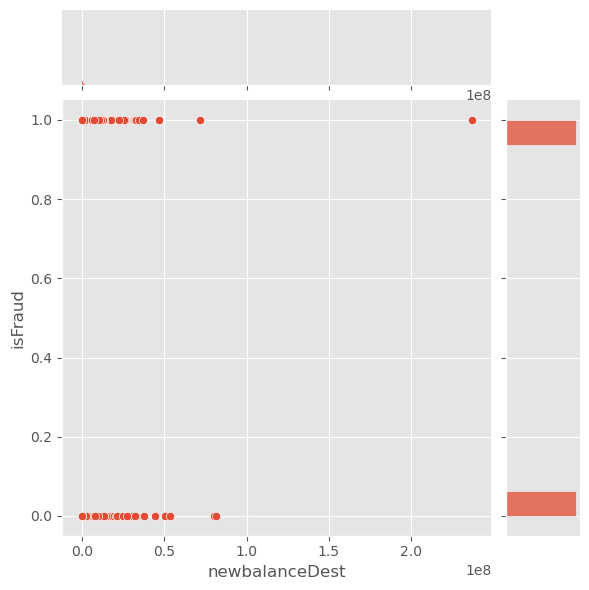

In [38]:
sns.jointplot(data=new_df, x="newbalanceDest", y="isFraud")


0 means legal transaction and 1 means fraudulent transaction



<Axes: xlabel='isFraud', ylabel='step'>

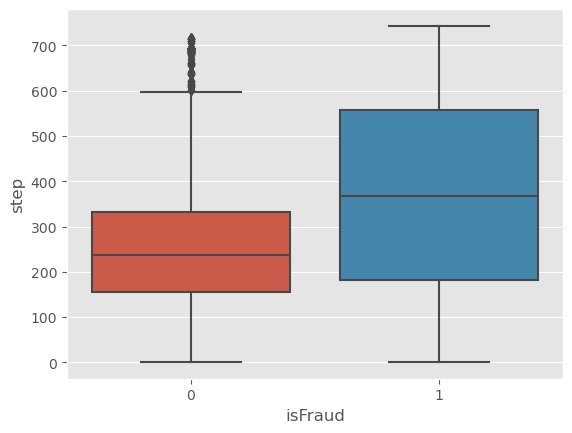

In [40]:
sns.boxplot(data=new_df, x="isFraud", y="step")


<Axes: xlabel='isFraud', ylabel='amount'>

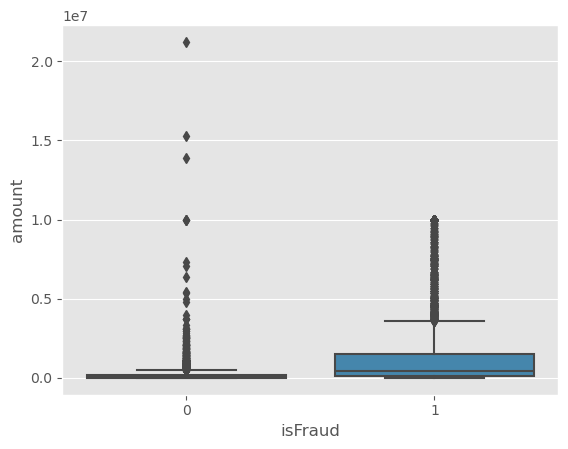

In [41]:
sns.boxplot(data=new_df, x="isFraud", y="amount")


<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

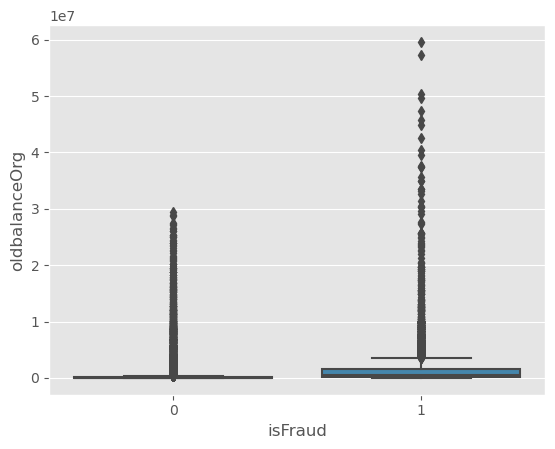

In [42]:
sns.boxplot(data=new_df, x="isFraud", y="oldbalanceOrg")


<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

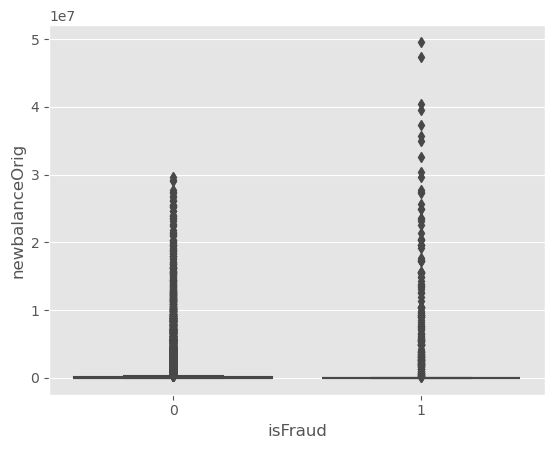

In [43]:
sns.boxplot(data=new_df, x="isFraud", y="newbalanceOrig")


Descriptive analysis


In [44]:
new_df.describe(include="all")


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,16426.000000,16426,1.642600e+04,16426,1.642600e+04,1.642600e+04,16426,1.642600e+04,1.642600e+04,16426.000000
unique,NaN,5,NaN,16426,NaN,NaN,16248,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C347350118,NaN,NaN,C766681183,NaN,NaN,NaN
freq,NaN,7049,NaN,1,NaN,NaN,4,NaN,NaN,NaN
mean,305.670218,NaN,8.208253e+05,NaN,1.222672e+06,5.054508e+05,NaN,8.306290e+05,1.256007e+06,0.500000
std,193.843652,NaN,1.852250e+06,NaN,3.198063e+06,2.428163e+06,NaN,3.182657e+06,3.556172e+06,0.500015
min,1.000000,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
25%,161.000000,NaN,3.733824e+04,NaN,1.022725e+04,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
50%,283.000000,NaN,1.741869e+05,NaN,1.176834e+05,0.000000e+00,NaN,0.000000e+00,1.279058e+05,0.500000
75%,409.000000,NaN,5.383997e+05,NaN,7.920856e+05,0.000000e+00,NaN,5.115226e+05,1.097807e+06,1.000000


Data preprocessing


In [45]:
new_df.shape


(16426, 10)

In [46]:
new_df.drop(["nameOrig", "nameDest"], axis=1, inplace=True)
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [47]:
new_df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
3950340,287,PAYMENT,27952.60,1228.00,0.00,0.00,0.00,0
409302,18,PAYMENT,7760.59,345567.11,337806.51,0.00,0.00,0
3757840,279,CASH_IN,232738.34,30958.00,263696.34,0.00,0.00,0
2554087,206,PAYMENT,12016.73,20599.63,8582.90,0.00,0.00,0
3313874,252,CASH_OUT,267054.06,40653.00,0.00,2562886.51,2829940.57,0


In [48]:
new_df.tail()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,850002.52,0.0,6510099.11,7360101.63,1


Checking null values


In [49]:
new_df.isnull().any()


step              False
type              False
amount            False
oldbalanceOrg     False
newbalanceOrig    False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
dtype: bool

In [50]:
new_df.isnull().sum()


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [51]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 3950340 to 6362619
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   isFraud         16426 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.1+ MB


Handling outliers


<Axes: xlabel='amount'>

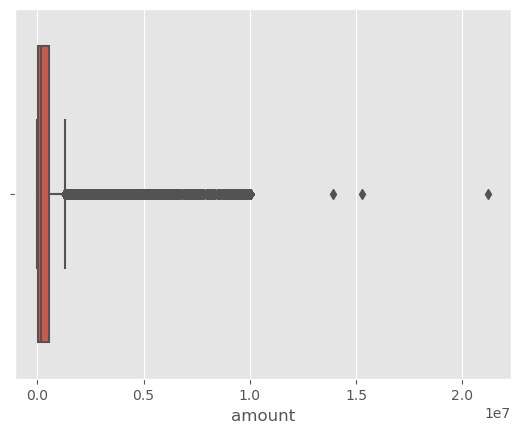

In [52]:
sns.boxplot(x=new_df["amount"])


In [53]:
q1 = new_df['amount'].quantile(0.25)
q3 = new_df['amount'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

mean = new_df['amount'].mean()

# Replace outliers with the mean value
new_df['amount'] = np.where(new_df['amount'] > upper_limit, mean, new_df['amount'])
new_df['amount'] = np.where(new_df['amount'] < lower_limit, mean, new_df['amount'])

<Axes: xlabel='amount'>

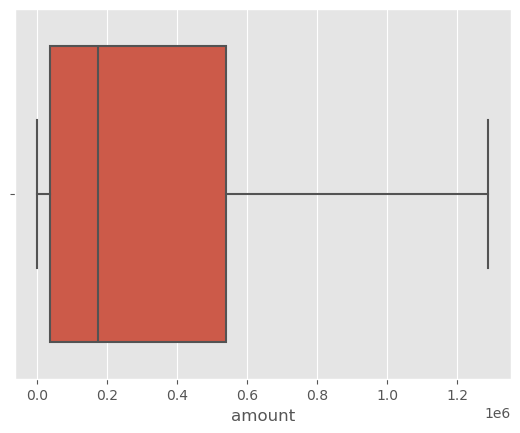

In [54]:
sns.boxplot(x=new_df["amount"])


Now outliers are removed in "amount" columns



<Axes: xlabel='oldbalanceOrg'>

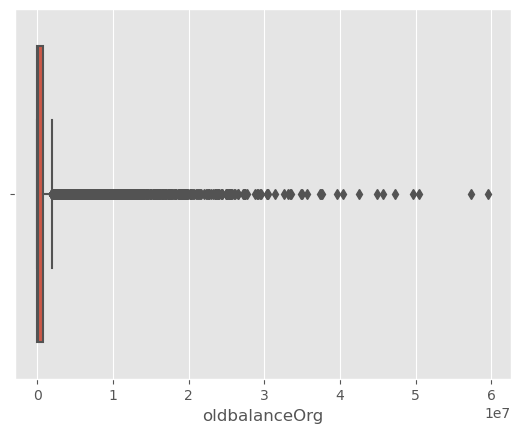

In [55]:
sns.boxplot(x=new_df["oldbalanceOrg"])


The column "oldbalanceOrg" has outliers which need to be treated



In [57]:
q1 = new_df['oldbalanceOrg'].quantile(0.25)
q3 = new_df['oldbalanceOrg'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

mean = new_df['oldbalanceOrg'].mean()

# Replace outliers with the mean value
new_df['oldbalanceOrg'] = np.where(new_df['oldbalanceOrg'] > upper_limit, mean, new_df['oldbalanceOrg'])
new_df['oldbalanceOrg'] = np.where(new_df['oldbalanceOrg'] < lower_limit, mean, new_df['oldbalanceOrg'])

<Axes: xlabel='oldbalanceOrg'>

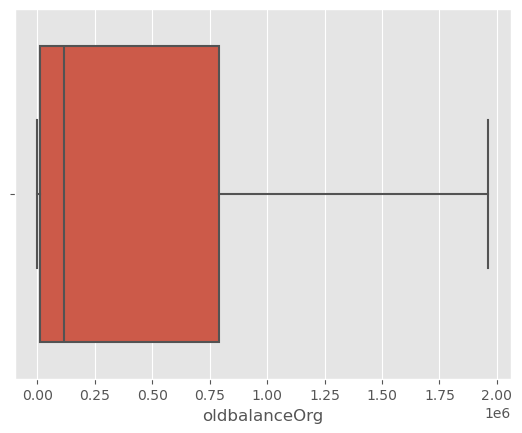

In [58]:
sns.boxplot(x=new_df["oldbalanceOrg"])


<Axes: xlabel='newbalanceOrig'>

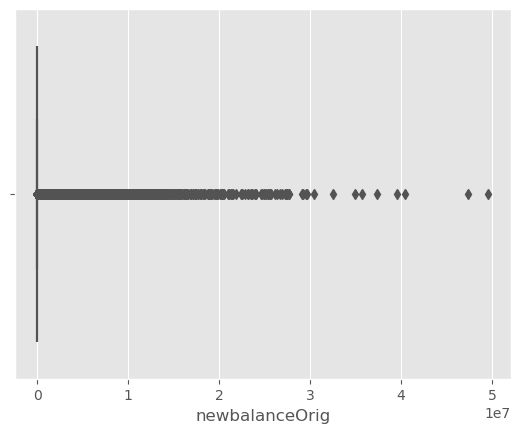

In [59]:
sns.boxplot(x=new_df["newbalanceOrig"])


In [60]:
#The column "newbalanceOrig" has outliers which need to be treated"

q1 = new_df['newbalanceOrig'].quantile(0.25)
q3 = new_df['newbalanceOrig'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

mean = new_df['newbalanceOrig'].mean()

# Replace outliers with the mean value
new_df['newbalanceOrig'] = np.where(new_df['newbalanceOrig'] > upper_limit, mean, new_df['newbalanceOrig'])
new_df['newbalanceOrig'] = np.where(new_df['newbalanceOrig'] < lower_limit, mean, new_df['newbalanceOrig'])

<Axes: xlabel='newbalanceOrig'>

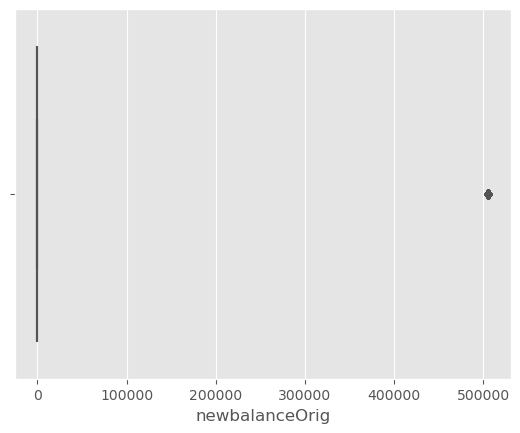

In [61]:
sns.boxplot(x=new_df["newbalanceOrig"])


Handling categorial or object data using label encoding


In [63]:
from sklearn.preprocessing import LabelEncoder


In [64]:
le = LabelEncoder() 

new_df["type"] = le.fit_transform(new_df["type"])

In [65]:
new_df["type"].value_counts()


type
1    7049
4    4766
3    2778
0    1783
2      50
Name: count, dtype: int64

In [66]:
le.classes_


array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)

In [67]:
map = dict(zip(le.classes_, range(len(le.classes_))))


In [68]:
map


{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

Dividing dataset into dependent and independent variable


In [69]:
x = new_df.drop("isFraud", axis=1) 
y = new_df["isFraud"]
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3950340,287,3,27952.60,1228.00,0.000000,0.00,0.00
409302,18,3,7760.59,345567.11,505450.763465,0.00,0.00
3757840,279,0,232738.34,30958.00,505450.763465,0.00,0.00
2554087,206,3,12016.73,20599.63,505450.763465,0.00,0.00
3313874,252,1,267054.06,40653.00,0.000000,2562886.51,2829940.57


In [70]:
y.head()


3950340    0
409302     0
3757840    0
2554087    0
3313874    0
Name: isFraud, dtype: int64

In [71]:
type(x)


pandas.core.frame.DataFrame

In [72]:
type(y)


pandas.core.series.Series

Splitting data into training and testing set


In [73]:
from sklearn.model_selection import train_test_split 


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)


In [75]:
print(x_train.shape) 
print(x_test.shape) 
print(y_test.shape)
print(y_train.shape)


(13140, 7)
(3286, 7)
(3286,)
(13140,)



Model building

1. Random forest classifier


In [76]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
#Initialising the model
rfc = RandomForestClassifier() 
rfc


RandomForestClassifier()

Training and testing the model


In [77]:
rfc.fit(x_train, y_train)


RandomForestClassifier()

In [78]:
#testing accuracy
y_test_predict1 = rfc.predict(x_test) 
test_accuracy = accuracy_score(y_test, y_test_predict1) 
test_accuracy

0.9936092513694461

In [79]:
# training accuracy 

y_train_predict1 = rfc.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_predict1) 
train_accuracy

1.0

Evaluating performance of the model


In [80]:
pd.crosstab(y_test, y_test_predict1)


col_0,0,1
isFraud,,
0,1617,13
1,8,1648


In [81]:
print(classification_report(y_test, y_test_predict1))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1630
           1       0.99      1.00      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



2. Decision trees

In [82]:
from sklearn.tree import DecisionTreeClassifier 
#Initialising the model
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

Training and testing the model


In [83]:
dtc.fit(x_train, y_train)


DecisionTreeClassifier()

In [84]:
# testing accuracy

y_test_predict2 = dtc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict2)
test_accuracy




0.9899573950091296

In [85]:
# training accuracy

y_train_predict2 = dtc.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_predict2) 
train_accuracy

1.0

#Evaluating the performance of the model


In [86]:
pd.crosstab(y_test, y_test_predict2)


col_0,0,1
isFraud,,
0,1608,22
1,11,1645


In [87]:
print(classification_report(y_test, y_test_predict2))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1630
           1       0.99      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



3. ExtraTrees classifier


In [88]:
from sklearn.ensemble import ExtraTreesClassifier
#Initialising the model
etc = ExtraTreesClassifier() 
etc


ExtraTreesClassifier()

Training and testing the model


In [89]:
etc.fit(x_train,y_train)


ExtraTreesClassifier()

In [90]:
# testing accuracy

y_test_predict3 = etc.predict(x_test) 
test_accuracy = accuracy_score(y_test, y_test_predict3) 
test_accuracy


0.9911746804625685

In [91]:
# training accuracy

y_train_predict3 = etc.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_predict3) 
train_accuracy



1.0

Evaluating the performance of the model


In [92]:

pd.crosstab(y_test,y_test_predict3)

col_0,0,1
isFraud,,
0,1616,14
1,15,1641


In [93]:
print(classification_report (y_test,y_test_predict3))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1630
           1       0.99      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



4. Support vector machine classifier


In [94]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#Initialising the model
svc = SVC()
svc

SVC()

Training and testing the model


In [95]:
svc.fit(x_train,y_train)


SVC()

In [96]:
# testing accuracy

y_test_predict4 = svc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict4)
test_accuracy



0.8657942787583688

In [97]:
# training accuracy

y_train_predict4 = svc.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_predict4) 
train_accuracy

0.860730593607306

Evaluating the performance of the model


In [99]:
pd.crosstab(y_test,y_test_predict4)


col_0,0,1
isFraud,,
0,1617,13
1,428,1228


In [100]:
from sklearn.metrics import classification_report, confusion_matrix 

print(classification_report(y_test, y_test_predict4))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1630
           1       0.99      0.74      0.85      1656

    accuracy                           0.87      3286
   macro avg       0.89      0.87      0.86      3286
weighted avg       0.89      0.87      0.86      3286



5. xgboost classifier


In [101]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
#Initialising the model
xgb1 = xgb.XGBClassifier()
xgb1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training and testing the model


In [103]:
xgb1.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [104]:
# testing accuracy

y_test_predict5 = xgb1.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict5)
test_accuracy




0.9951308581862447

In [105]:
# training accuracy

y_train_predict5 = svc.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_predict5) 
train_accuracy

0.860730593607306

Evaluating the performance of the model

In [106]:
pd.crosstab(y_test, y_test_predict5)


col_0,0,1
isFraud,,
0,1620,10
1,6,1650


In [107]:
from sklearn.metrics import classification_report, confusion_matrix 

print(classification_report (y_test, y_test_predict5))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1630
           1       0.99      1.00      1.00      1656

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286



Comparing models


In [108]:
def compareModel():
    print("Train accuracy for RFC: ", accuracy_score(y_train_predict1,y_train)*100) 
    print("Test accuracy for RFC: ", accuracy_score(y_test_predict1,y_test)*100) 
    print("\n")
    print("Train accuracy for DTC: ", accuracy_score(y_train_predict2,y_train)*100) 
    print("Test accuracy for DTC: ", accuracy_score(y_test_predict2,y_test)*100) 
    print("\n")
    print("Train accuracy for ETC: ", accuracy_score(y_train_predict3,y_train)*100) 
    print("Test accuracy for ETC: ", accuracy_score (y_test_predict3,y_test)*100) 
    print("\n")
    print("Train accuracy for SVC: ", accuracy_score(y_train_predict4,y_train)*100) 
    print("Test accuracy for SVC: ", accuracy_score(y_test_predict4,y_test)*100) 
    print("\n")
    print("Train accuracy for XGB: ", accuracy_score(y_train_predict5,y_train)*100) 
    print("Test accuracy for XGB: ", accuracy_score(y_test_predict5,y_test)*100)

In [109]:
compareModel()


Train accuracy for RFC:  100.0
Test accuracy for RFC:  99.36092513694462


Train accuracy for DTC:  100.0
Test accuracy for DTC:  98.99573950091296


Train accuracy for ETC:  100.0
Test accuracy for ETC:  99.11746804625685


Train accuracy for SVC:  86.0730593607306
Test accuracy for SVC:  86.57942787583688


Train accuracy for XGB:  86.0730593607306
Test accuracy for XGB:  99.51308581862448


On comparing the training and testing of 5 different models trained by 5 different algorithms, we have found that XGBoost Classifier is the best model as it has the highest testing accuracy and is not overfitting.